In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime as dt
plt.rc('font', size=10)
warnings.filterwarnings('ignore')
import seaborn as sns
from us_state_abbrev import abbrev_to_us_state, us_state_to_abbrev
sns.set(style='whitegrid', color_codes=True, rc={'figure.figsize':(11,8)}, font_scale=1.5)

In [2]:
_DATA_DIR = './data'

In [3]:
# Testing
data = pd.read_csv('%s/csse_covid_19_daily_reports/04-04-2022.csv'%(_DATA_DIR), index_col = 0)
data = data.dropna(axis=1)
data = data.drop(['Last_Update', 'Combined_Key'], axis=1)
data.columns

Index(['Country_Region', 'Confirmed', 'Deaths'], dtype='object')

In [4]:
# Getting Covid Total Cases time series

tsd = pd.read_csv('%s/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'%(_DATA_DIR), index_col = 0)
tsd = tsd.reset_index(drop=True)
tsd = tsd.drop(['Lat', 'Long'], axis=1)

In [5]:
# Getting Vax time series
vaxTSD = pd.read_csv('%s/data_county_timeseries.csv'%(_DATA_DIR), index_col = 0)
# vaxTSD

#test
# vaxTSD[(vaxTSD['STATE'] == 1) & (vaxTSD['YEAR'] == 2021)]
Figure 1 shows the rapid rise in U.S. coronavirus cases for individuals with partial and complete vaccination coverage along with extremely low case levels for those with booster coverage.  The rate of growth in case rates for partially- and completely-vaccinated individuals decreased around 5/2021.  However, cases for partially- and completely-vaccinated individuals continued to rise from 5/2021 to 1/2022.  Toward the end of 2021, cases rose rapidly among individuals with booster coverage.

Over the entire period (1/2021 - 3/2022), partially-vaccinated individuals saw the highest case levels followed closely by completely-vaccinated individuals.  Case levels among individuals with booster coverage were significantly lower through the first ten months of 2021, but reached almost 50% of complete-vaccination cases in 3/2022 as the 

In [7]:
# Vax time series date with W-Y labels
vaxTSD['W-Y'] = vaxTSD.WEEK.map(str) + "-" + vaxTSD.YEAR.map(str)
dates = vaxTSD.YEAR*100+vaxTSD.WEEK
vaxTSD['date'] = pd.to_datetime(dates.astype(str) + '0', format='%Y%W%w')

In [8]:
df = pd.DataFrame()
dfN = pd.DataFrame()
df['CASES'] = vaxTSD.groupby(['WEEK', 'YEAR', 'W-Y', 'STATE', 'CASE_TYPE'])['CASES'].sum()
dfN['CASES'] = vaxTSD.groupby(['WEEK', 'YEAR', 'W-Y', 'CASE_TYPE'])['CASES'].sum()
dfN = dfN.reset_index()
dfN = dfN.sort_values(by = ['YEAR', 'WEEK'], ascending = [True, True])
dfN.head(10)
dates = dfN.YEAR*100+dfN.WEEK
dfN['date'] = pd.to_datetime(dates.astype(str) + '0', format='%Y%W%w')

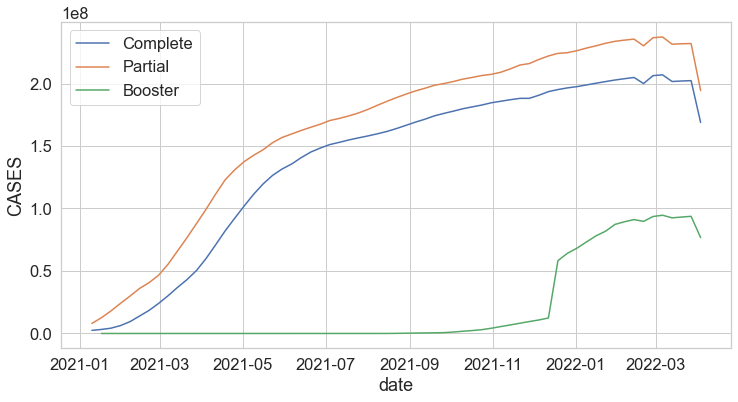

In [9]:
# Total Vaccinations in United States by week
fig, ax = plt.subplots(figsize=(12,6))
tempData = dfN.query("CASE_TYPE == 'Complete'")
sns.lineplot(data=tempData, x="date", y="CASES")
tempData = dfN.query("CASE_TYPE == 'Partial'")
sns.lineplot(data=tempData, x="date", y="CASES")
tempData = dfN.query("CASE_TYPE == 'Booster'")
plot = sns.lineplot(data=tempData, x="date", y="CASES")
plt.legend(labels=['Complete','Partial','Booster'])


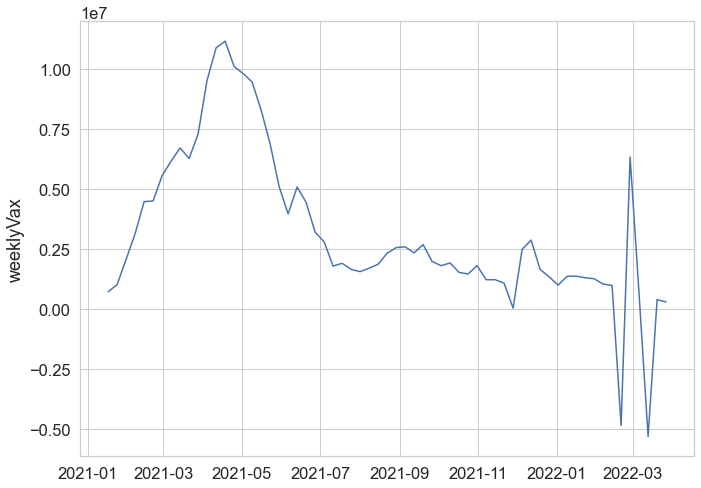

In [10]:
complete = dfN[dfN['CASE_TYPE']=='Complete']
complete['weeklyVax'] = complete['CASES'].diff()
complete['date'] = complete['date'].dt.strftime('%m/%d/%Y')
complete.drop(complete.tail(1).index,inplace=True)
dates_list_c = [dt.datetime.strptime(date, '%m/%d/%Y').date() for date in complete['date']]
plot = sns.lineplot(x=dates_list_c, y=complete['weeklyVax'])
# plot.xaxis.set_major_locator(ticker.LinearLocator(10))

In [11]:
# dfN[dfN['CASE_TYPE']=='Complete'].tail(20)

<!-- Figure 5 shows total coronavirus cases in tens of millions from 1/2021 to 4/2022.  We can find several points of relatively rapid growth in total cases, such as is found around the red and yellow vertical lines. So far in the beginning of 2022, the rate of growth in total cases has apparently spiked, bringing total cases from about 55 million at the beginning of the year to over 80 million as of 4/2022.   -->

In [14]:
# fig, ax = plt.subplots(figsize=(12,6))
# temp = dfN[dfN['CASE_TYPE']=='Complete']
# plt.plot(temp['W-Y'], temp['CASES'], label="Complete vax", linestyle="-")
# temp = dfN[dfN['CASE_TYPE']=='Partial']
# plt.plot(temp['W-Y'], temp['CASES'], label="Partial vax", linestyle="-")
# temp = dfN[dfN['CASE_TYPE']=='Booster']
# plt.plot(temp['W-Y'], temp['CASES'], label="Booster vax", linestyle="-")
# plt.legend()
# plt.show()

In [15]:
# idrk how coverage is different, smaller numbers/percentage?
# temp = dfN[dfN['CASE_TYPE']=='Complete Coverage']
# plt.plot(temp['W-Y'], temp['CASES'], label="Complete vax", linestyle="-")
# temp = dfN[dfN['CASE_TYPE']=='Partial Coverage']
# plt.plot(temp['W-Y'], temp['CASES'], label="Partial vax", linestyle="-")
# temp = dfN[dfN['CASE_TYPE']=='Booster Coverage']
# plt.plot(temp['W-Y'], temp['CASES'], label="Booster vax", linestyle="-")
# plt.legend()
# plt.show()

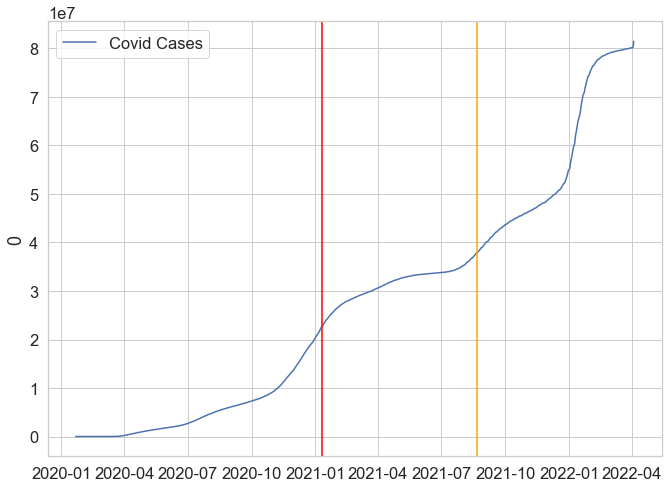

In [54]:
# Total Cases Total
usData=tsd[tsd['Country/Region']=='US']
usData=usData.drop('Country/Region', axis=1)
usData= usData.reset_index(drop=True)
dates_list = [dt.datetime.strptime(date, '%m/%d/%y').date() for date in usData.columns.values]
dates_list = np.array(dates_list)
plot = sns.lineplot(x = dates_list, y=usData.iloc[0], label="Covid Cases")
# plt.vlines(dt.datetime(2021, 1, 10), 80000000, 80000000,color="red", linestyles ="dashed",lw = 3)
plt.axvline(dt.datetime(2021, 1, 10), color="red")
plt.axvline(dt.datetime(2021, 8, 22), color="orange")


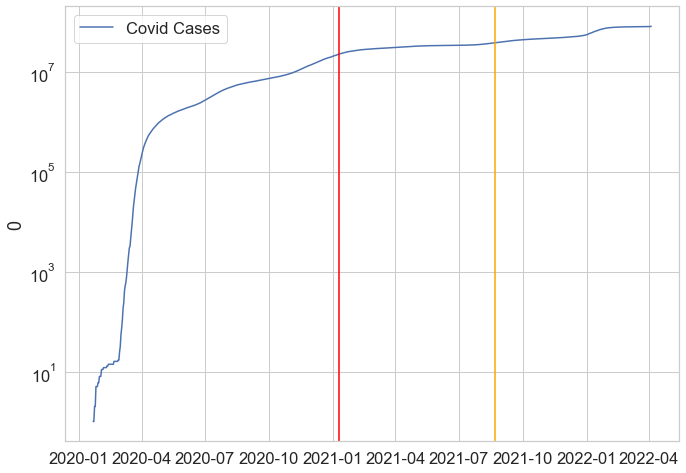

In [55]:
plot = sns.lineplot(x = dates_list, y=usData.iloc[0], label="Covid Cases")
plot.set(yscale='log')
plt.axvline(dt.datetime(2021, 1, 10), color="red")
plt.axvline(dt.datetime(2021, 8, 22), color="orange")

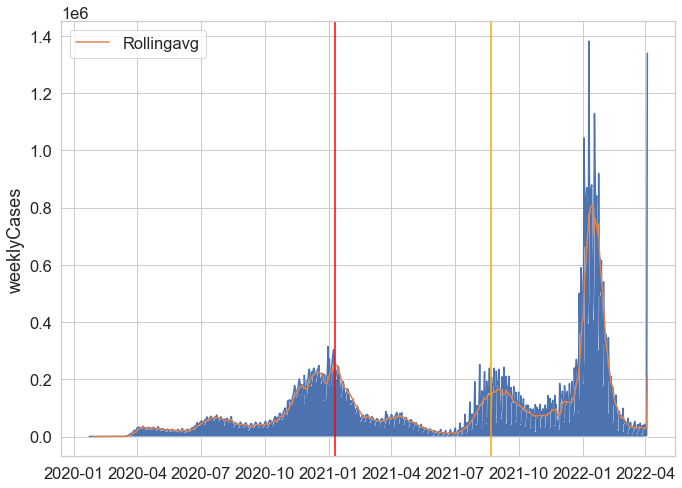

In [56]:
# Change per week of covid cases in US
data = pd.DataFrame()
data['weeklyCases'] = np.diff(usData.iloc[0]) / 1
data['x_p'] = 1
data['7week_rolling_avg'] = data.weeklyCases.rolling(7).mean()
dates_cases_week = [dt.datetime.strptime(date, '%m/%d/%y').date() for date in usData.columns.values[1:]]
dates_cases_week = np.array(dates_list)
plot = sns.lineplot(x=dates_cases_week[1:], y=data['weeklyCases'])
sns.lineplot(x=dates_cases_week[1:], y=data['7week_rolling_avg'], label = 'Rollingavg') #TIME WEIGHTED AVERAGE
plt.fill_between(dates_cases_week[1:], data['weeklyCases'])
data = data.drop(['x_p'], axis=1)
plt.axvline(dt.datetime(2021, 1, 10), color="red")
plt.axvline(dt.datetime(2021, 8, 22), color="orange")

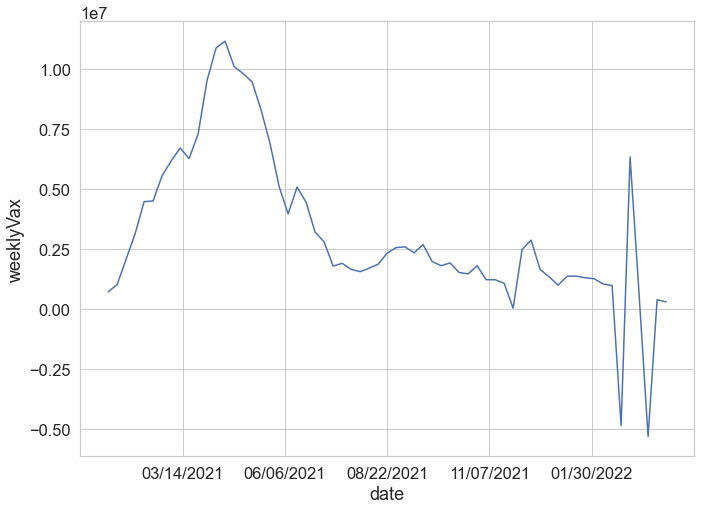

In [57]:
plot = sns.lineplot(x=complete['date'], y=complete['weeklyVax'])
plot.xaxis.set_major_locator(ticker.LinearLocator(7))

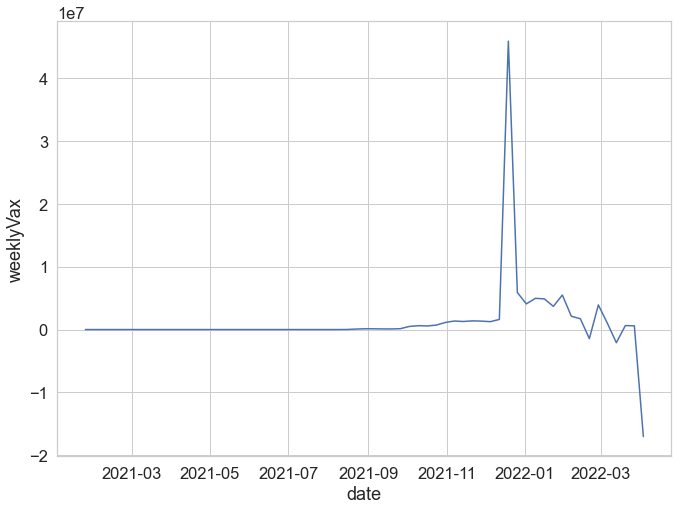

In [58]:
booster = dfN[dfN['CASE_TYPE']=='Booster']
booster['weeklyVax'] = booster['CASES'].diff()
# booster['date'] = [dt.datetime.strptime(date, '%m/%d/%Y').date() for date in booster['date']]
plot = sns.lineplot(x=booster['date'], y=booster['weeklyVax'])

In [104]:
usTSD = pd.read_csv('%s/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'%(_DATA_DIR), index_col = 0)
usTSD = usTSD.drop(['iso2','iso3','code3','FIPS', 'Admin2','Country_Region','Lat', 'Long_','Combined_Key'], axis=1)
usTSD=usTSD.groupby(['Province_State']).sum()
usTSD = usTSD.reset_index()
usTSD.rename(columns={'Province_State':'STATE'}, inplace=True)

population = pd.read_csv('%s/nst-est2019-alldata.csv'%(_DATA_DIR), index_col = 0)
population = population.drop(['REGION','DIVISION','STATE'], axis=1)
# population = population.drop(population.columns.difference(['NAME','POPESTIMATE2019']), axis=1,inplace=True)
population = population.loc[:, population.columns.intersection(['NAME','POPESTIMATE2019'])]
population.rename(columns={'NAME':'STATE', 'POPESTIMATE2019':'Population'}, inplace=True)
population = population.reset_index(drop=True)
usTSD = pd.merge(usTSD, population, on='STATE', how="left")


In [105]:
usTSD = usTSD.T
usTSD.columns = usTSD.iloc[0]
usTSD = usTSD.drop('STATE')
usTSD = usTSD.reset_index()
usTSD = usTSD.rename(columns={'index':'date'})

In [106]:
usTSD
stateCovidTotal = usTSD.iloc[-2:-1, 1:].T
stateCovidTotal = stateCovidTotal.reset_index()
stateCovidTotal = stateCovidTotal.rename(columns={803: 'TotalCases'})
pop = usTSD.iloc[-1, 1:].T.to_frame().reset_index()
pop = pop.rename(columns={804: 'Population'})
stateCovidTotal['CasesPerPerson'] = stateCovidTotal['TotalCases'] / pop['Population']

In [107]:
vax_by_state = pd.DataFrame()
vax_by_state['CASES'] = vaxTSD.groupby(['STATE_NAME', 'date', 'CASE_TYPE'])['CASES'].sum()
vax_by_state = vax_by_state.reset_index()
vax_by_state[vax_by_state['STATE_NAME']=='CA']
d1 = dt.datetime(2022, 4, 3)
per_vax = vax_by_state.loc[(vax_by_state['date'] == d1) |
                           ((vax_by_state['STATE_NAME'] =='CA') & (vax_by_state['date'] == dt.datetime(2022, 3, 27)))]
per_vax = per_vax.loc[vax_by_state['CASE_TYPE'] == 'Complete']

for ind in per_vax.index:
    temp = per_vax['STATE_NAME'][ind]
    per_vax['STATE_NAME'][ind] = abbrev_to_us_state[temp]
per_vax = per_vax.reset_index(drop=True)
per_vax = per_vax.rename(columns={"STATE_NAME": "STATE"})
per_vax = pd.merge(per_vax, population, on='STATE', how="left")
per_vax['VaxPerPerson'] = per_vax['CASES']/per_vax['Population']
vax_by_state=per_vax
vax_by_state.head()


,STATE,date,CASE_TYPE,CASES,Population,VaxPerPerson
0,Alaska,2022-04-03,Complete,440258.0,731545.0,0.601819
1,Alabama,2022-04-03,Complete,2293899.0,4903185.0,0.467839
2,Arkansas,2022-04-03,Complete,1472157.0,3017804.0,0.487824
3,Arizona,2022-04-03,Complete,4329936.0,7278717.0,0.594876
4,California,2022-03-27,Complete,27245053.0,39512223.0,0.689535


In [108]:
stateCovidDataFrame = pd.merge(vax_by_state, stateCovidTotal, on='STATE', how="left")

## Cases and Deaths pre & post vax

In [109]:
# Realized I just had to do this for all the rates:
mostRecentUS = pd.read_csv('%s/csse_covid_19_daily_reports_us/04-04-2022.csv'%(_DATA_DIR), index_col = 0).reset_index()
mostRecentUS = mostRecentUS.drop(['Country_Region','Last_Update','Lat','Long_','Recovered','Active', 'Long_','People_Hospitalized','UID', 'ISO3', 'Hospitalization_Rate'], axis=1)
mostRecentUS = mostRecentUS.rename(columns={'Province_State': 'STATE'})
mostRecentUS = pd.merge(mostRecentUS, stateCovidDataFrame[['STATE','VaxPerPerson','Population']], on='STATE', how="left")
mostRecentUS['Vax_Rate'] = mostRecentUS['VaxPerPerson']*100000
mostRecentUS[mostRecentUS['STATE']=='Washington']


,STATE,Confirmed,Deaths,FIPS,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,VaxPerPerson,Population,Vax_Rate
54,Washington,1458424,12515,53.0,19152.258607,NaN,0.858118,NaN,0.691269,7614893.0,69126.867574


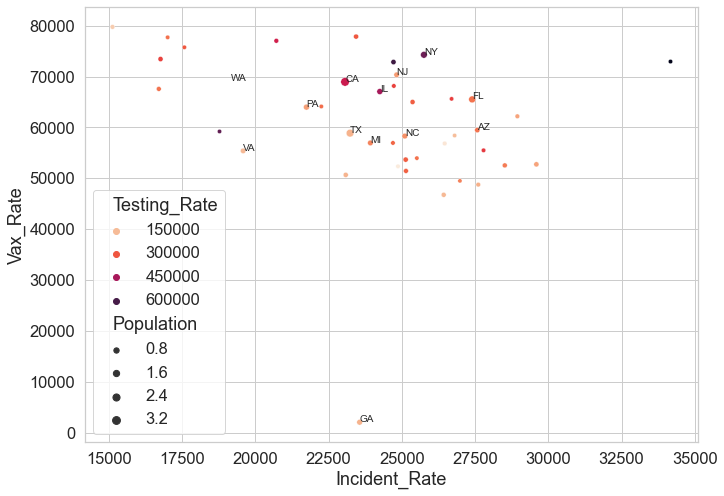

In [127]:
sns.scatterplot(data=mostRecentUS, x='Incident_Rate', y='Vax_Rate',
                size=mostRecentUS['Population'], hue = 'Testing_Rate', palette='rocket_r')
for p, s, x, y in zip(mostRecentUS.Population, mostRecentUS.STATE,
                      mostRecentUS.Incident_Rate, mostRecentUS.Vax_Rate):
    if p >= 6903185.0:
        plt.annotate(us_state_to_abbrev[s], (x+.2, y + 0.2), fontsize=10)

(40000.0, 90000.0)

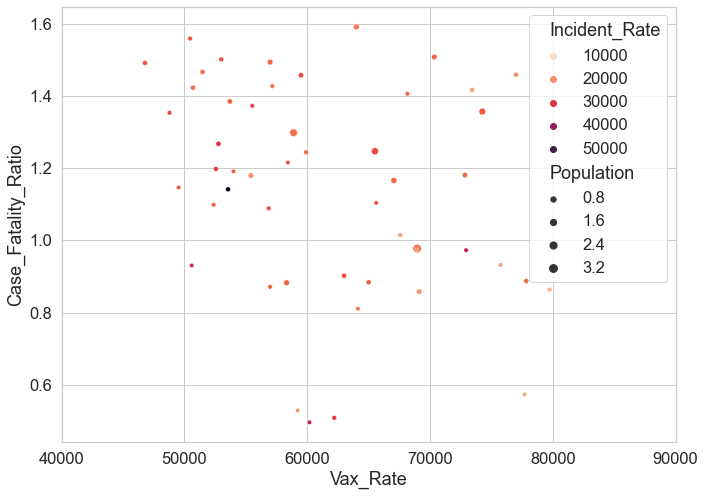

In [112]:
plot = sns.scatterplot(data=mostRecentUS, x='Vax_Rate', y='Case_Fatality_Ratio',
                size=mostRecentUS['Population'], hue = 'Incident_Rate', palette='rocket_r' )
plot.set_xlim(40000, 90000)

In [130]:
# Looking at deaths/cases after vax 
# date that vax becomes widely avaliable dt.datetime(2021, 8, 22)
vaxReleasedData = pd.read_csv('%s/csse_covid_19_daily_reports_us/08-22-2021.csv'%(_DATA_DIR), index_col = 0).reset_index()
dataPostVax = mostRecentUS.copy(deep=True)
dataPostVax['Confirmed'] = dataPostVax['Confirmed'] - vaxReleasedData['Confirmed']
dataPostVax['Deaths'] = dataPostVax['Deaths'] - vaxReleasedData['Deaths']
dataPostVax['Total_Test_Results'] = dataPostVax['Total_Test_Results'] - vaxReleasedData['Total_Test_Results']
dataPostVax['Incident_Rate'] = dataPostVax['Confirmed']/dataPostVax['Population'] * 100000
dataPostVax['Case_Fatality_Ratio'] = dataPostVax['Deaths']/dataPostVax['Population'] * 100000
dataPostVax['Testing_Rate'] = dataPostVax['Total_Test_Results']/dataPostVax['Population'] * 100000

## When Vaccine Becomes Readily Avaliable Cases & Deaths

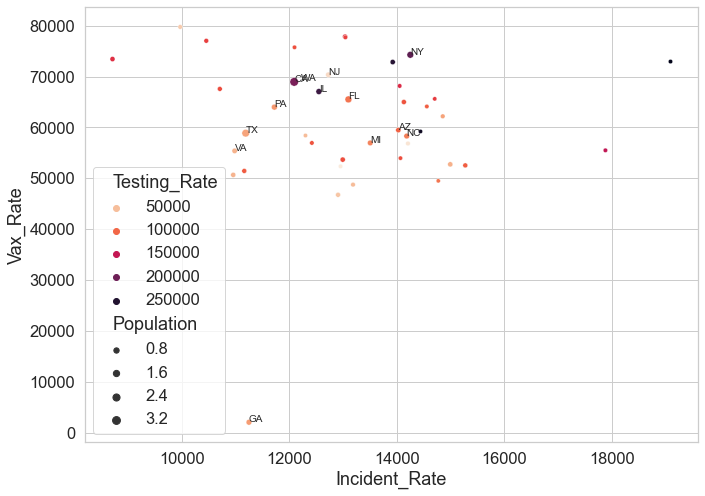

In [131]:
sns.scatterplot(data=dataPostVax, x='Incident_Rate', y='Vax_Rate',
                size=dataPostVax['Population'], hue = 'Testing_Rate', palette='rocket_r')
for p, s, x, y in zip(dataPostVax.Population, dataPostVax.STATE,
                      dataPostVax.Incident_Rate, dataPostVax.Vax_Rate):
    if p >= 6903185.0:
        plt.annotate(us_state_to_abbrev[s], (x+.2, y + 0.2), fontsize=10)

(40000.0, 90000.0)

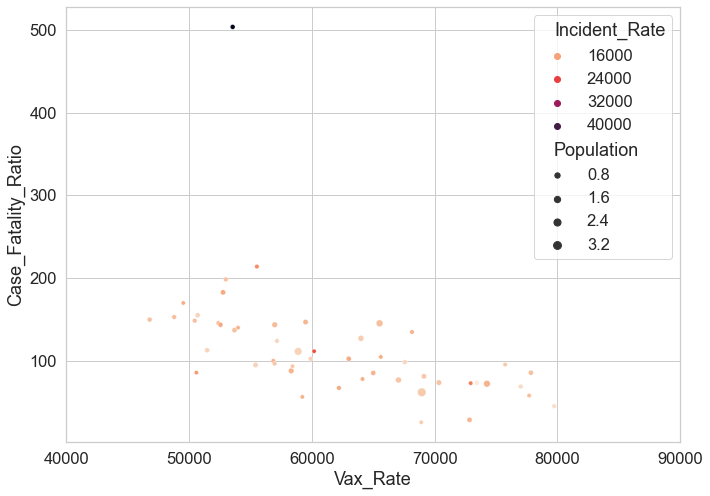

In [132]:
plot = sns.scatterplot(data=dataPostVax, x='Vax_Rate', y='Case_Fatality_Ratio',
                size=dataPostVax['Population'], hue = 'Incident_Rate', palette='rocket_r' )
plot.set_xlim(40000, 90000)